# Introduction

In today's fast-moving music industry, where streaming platforms determine much of a song's success, understanding what makes a song popular has become more important than ever. Our final project aims to take a data driven approach to analyze different factors that influence a song's popularity and aims to build a model that can predict what makes a song popular and why. 

# About the Data

We will be using a dataset from Kaggle that contains over 13,000 songs along with several parameters and measurable features. Each song entry includes both quantitative features, such as acousticness, danceability, energy, instrumentalness, loudness, speechiness, tempo, and valence, as well as metadata like genre, artist name, and release year. The target variable in this dataset is the song's popoularity score that represents how well the song performed.

We believed this dataset was a great set to use for regression modeling. Due to the mix of numerical and categorical variables, we will be using 3 different regression models (Linear, Random Forest, Gradient Boosting) to evaluate the different performances. We plan to test and compare these models to see which best captures the relationship between the different parameters and listener engagement.

# Our Goal

Our goal is to do more than build a model, we want more insight into song's popularity. We aim to answer which features matter most? Are there any unexpected patterns in what makes a song rise in popularity? Which genres tend to produce the most popular songs? 

The ultimate goal though is to not just predict song success, but to uncover any unexpected patterns and translate those into meaningful insights. This data could be valuable for several different industries and fields, increasing more hit songs. We hope to gain a deeper understanding of popularity, trends, and what shapes the music we all know and listen to today.

# Pre-Processing

In [20]:
import pandas as pd 
df = pd.read_csv("song_data.csv")

In [21]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [22]:
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

In [23]:
df.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [24]:
df.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [25]:
print("Total Duplicates: ", df.duplicated().sum())

Total Duplicates:  3909


In [26]:
df.drop_duplicates(inplace=True)
print("Total Duplicates: ", df.duplicated().sum())
print("Total Entries: ", df.shape[0])

Total Duplicates:  0
Total Entries:  14926


Only thing of note is that song_name is an object so we'll drop that in order to avoid any issues with the modeling.

In [27]:
df = df.drop('song_name', axis = 1);

# Data Visualization

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Define our predictors (X) and regressor (y)

X = df.drop('song_popularity', axis =1)
y = df['song_popularity']

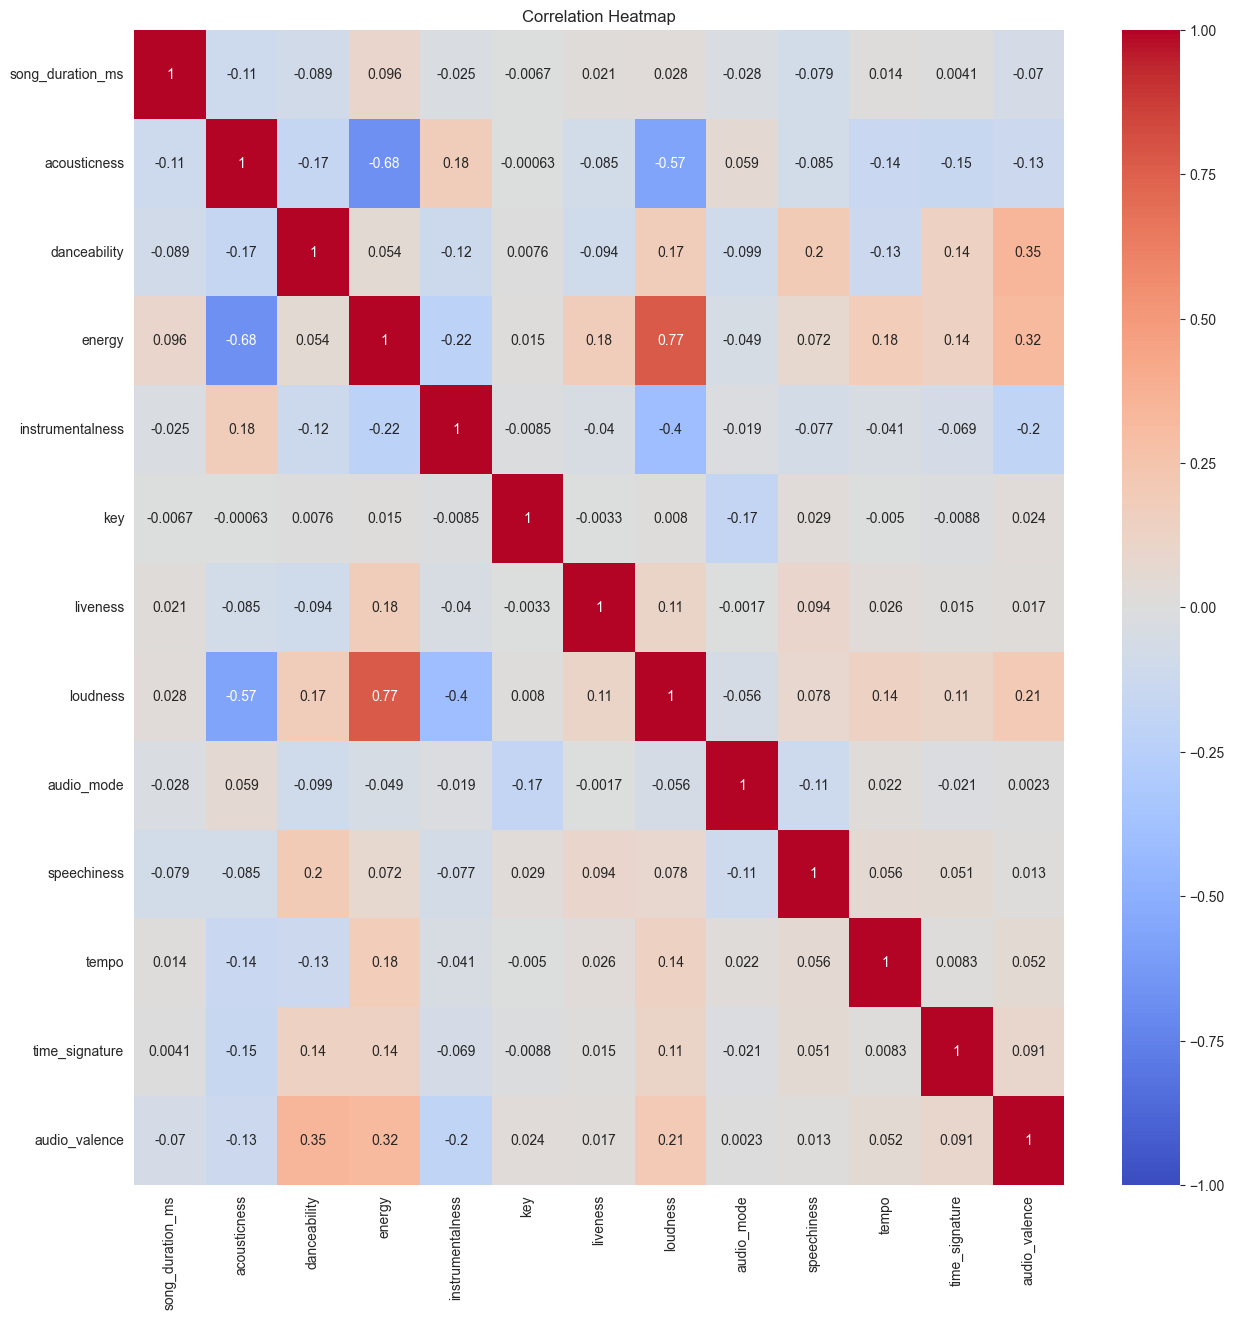

In [30]:
# Visualization 1: Correlation Matrix

corr_matrix = X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

There is some correlation amongst our X variables, which could potentially lead to some issues during modeling. 

# Modeling Linear Regression

For modeling linear regression we can implement a few new libraries to see how well this type of model will perform. While the score that we get might not be the best, this is to test to see the overall result that linear regression can come up with.  

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

Now that we have imported new libraries, we can start our linear regression training process. We can begin by encoding categorical features and combining those with numerical ones. The next step is to split the data and predict, calculate the MSE and R2 score, and create the feature coefficient importance. 

In [32]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Encode Categorical Features
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Combine features with numerical
X_numerical = X[numerical_cols].reset_index(drop=True)
X_processed = pd.concat([X_numerical, X_encoded], axis=1)

# Split data & Predict
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Results:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

feature_importance = pd.DataFrame({
    'feature': numerical_cols,
    'coefficient': model.coef_[:len(numerical_cols)]
})
feature_importance = feature_importance.sort_values('coefficient', key=abs, ascending=False)

Linear Regression Results:
Mean Squared Error: 402.08
R-squared Score: 0.02


We can now see the results that we have gotten from the linear model regression, and they are not that great. A high MSE score represents significant prediction errors in this case, and a low R squared score such as this shows that the model only explains for about 4% of the variaton which is very low.  

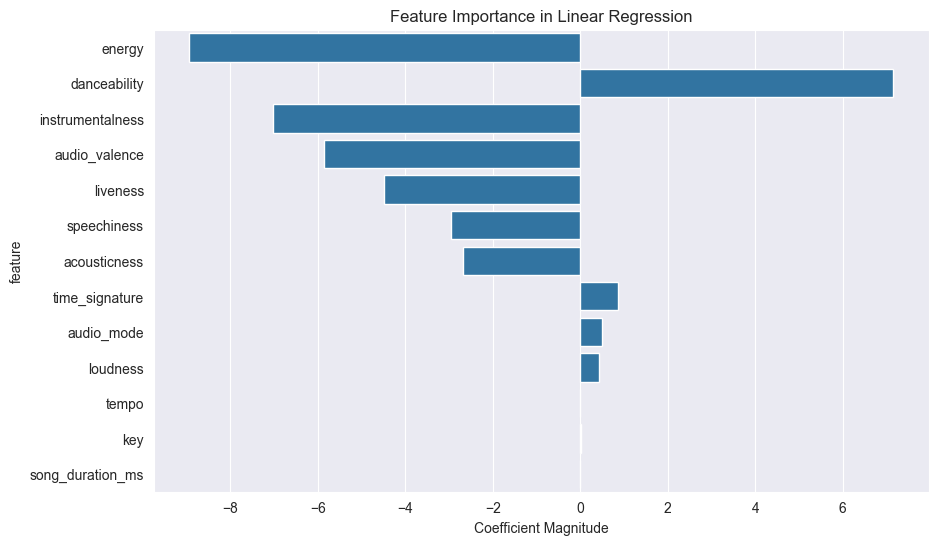

In [33]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='coefficient', y='feature', data=feature_importance)
plt.title('Feature Importance in Linear Regression')
plt.xlabel('Coefficient Magnitude')
plt.show()

Viewing the visualization we can see that using linear regression, it has identified that danceability has the greatest effect. The bars to the right of the graph indicate what features make a song more popular, while the bars to the left indicate what makes the songs less popular. While the scores we got aren't ideal it's possible that other methods like Gradient Boosting or Random Forests could yield better results. 

# Modeling Random Forest Regression

To model random forest regression, we will import the necessary library to start. we will then use the already defined training data to train this model and extract some statistics about its performance. Lastly we will get some information about the effects of song features on song popularity.

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
mse_rf   = mean_squared_error(y_test, y_pred_rf)
r2_rf    = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print(f"  Mean Squared Error: {mse_rf:.2f}")
print(f"  R-squared Score:   {r2_rf:.2f}")

Random Forest Regression Results:
  Mean Squared Error: 402.21
  R-squared Score:   0.02


Although these statistics mean that the model isn't performing too well, we can still find which features of a song have the highest impact on popularity.

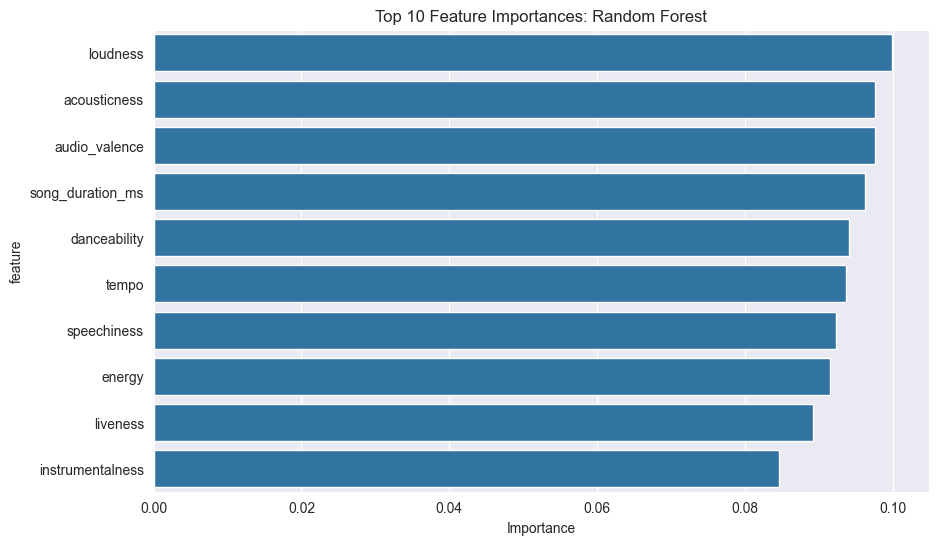

In [35]:
rf_imp = pd.DataFrame({
    'feature': X_processed.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=rf_imp)
plt.title('Top 10 Feature Importances: Random Forest')
plt.xlabel('Importance')
plt.show()

Although the features have a similar level of importance, loudness and acousticness seem to have the highest impact on popularity according to the random forest regression model.

# Modeling Gradient Boosting Regression

To model gradient boosting regression, we will import the necessary library to start. We will then use the training data from above to train the model and extract some information about song features.

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
mse_gb    = mean_squared_error(y_test, y_pred_gb)
r2_gb     = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression Results:")
print(f"  Mean Squared Error: {mse_gb:.2f}")
print(f"  R-squared Score:   {r2_gb:.2f}")

Gradient Boosting Regression Results:
  Mean Squared Error: 391.61
  R-squared Score:   0.05


Even though this model did better than the previous ones, its performance is still quite poor. However, we still would like to see what it finds regarding feature importance in relation to song popularity.

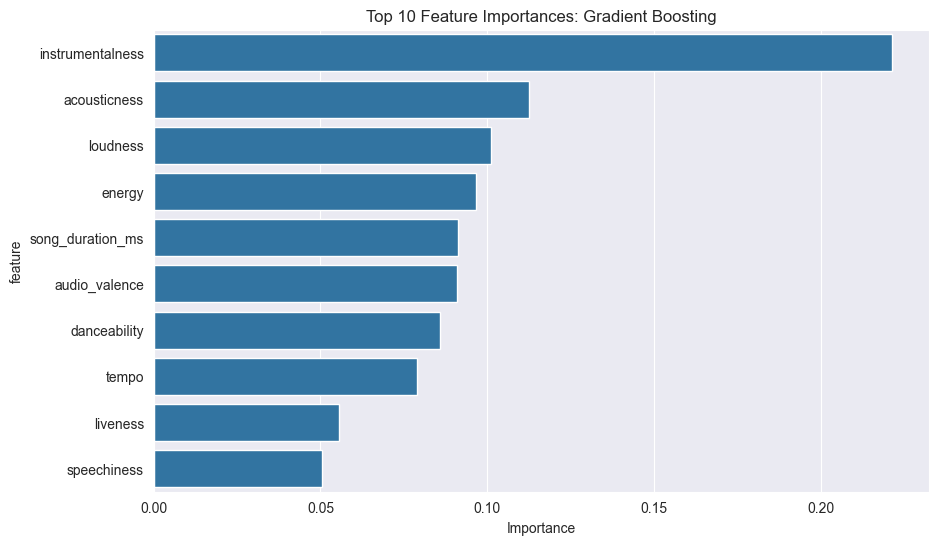

In [37]:
gb_imp = pd.DataFrame({
    'feature': X_processed.columns,
    'importance': gb.feature_importances_
}).sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=gb_imp)
plt.title('Top 10 Feature Importances: Gradient Boosting')
plt.xlabel('Importance')
plt.show()

Surprisingly, instrumentalness is the most important feature by a significant margin according to the gradient boosting regression model. Acousticness and loudness are next up followed closely by energy and song duration.